# House Price Prediction

# Problem statement

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.


## About Dataset

This dataset I have taken from kaggle. 
You can find this dataset here: https://www.kaggle.com/datasets/shibumohapatra/house-price


**Dataset Description:**
Field and Description

* **longitude (signed numeric - float)** : Longitude value for the block in California, USA
* **latitude (numeric - float )** : Latitude value for the block in California, USA
* **housing_median_age (numeric - int )** : Median age of the house in the block
* **total_rooms (numeric - int )** : Count of the total number of rooms (excluding bedrooms) in all houses in the block
* **total_bedrooms (numeric - float )** : Count of the total number of bedrooms in all houses in the block
* **population (numeric - int )** : Count of the total number of population in the block
* **households (numeric - int )** : Count of the total number of households in the block
* **median_income (numeric - float )** : Median of the total household income of all the houses in the block
* **ocean_proximity (numeric - categorical )** : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
* **median_house_value (numeric - int )** : Median of the household prices of all the houses in the block

# Importing the Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression

# Loading the Data

In [2]:
data = pd.read_csv("House Price DataSet.csv")

## Exploratory Data Analysis.

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# Let's check shape
data.shape

(20640, 10)

In our data 20640 rows and 10 columns

In [5]:
# Lets check dtypes and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


 As we can see in columns of total bedroom 7 values are missing

In [6]:
data.total_bedrooms.value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In most of data, value of `total_bedrooms` is 280.0, so We'll fill 280.0 at place of missing value.

In [7]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(value=280.0,inplace=False)
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
# Check dtypes
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

The datatypes for ocean_proximity in object, we want all data in numeric,We need to change datatypes for ocean proximity

In [9]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

We are going to do `label encoding` for ocean proximity
like:
* <1H OCEAN - 0
* INLAND - 1
* INLAND - 2
* NEAR BAY - 3
* NEAR OCEAN - 4

In [10]:
le = LabelEncoder()
le.fit(data.ocean_proximity)
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [11]:
le.transform(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])

array([0, 1, 2, 3, 4])

In [12]:
data["ocean_proximity"] = le.transform(data.ocean_proximity)

In [13]:
data.ocean_proximity[:10]

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: ocean_proximity, dtype: int32

## Get the Statistical summary of Dataset

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,535.284351,420.053240,1.0000,292.0000,431.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
ocean_proximity,20640.0,1.165843,1.420662,0.0000,0.0000,1.0000,1.00000,4.0000
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Text(0.5, 1.0, 'Correlations Between Variables')

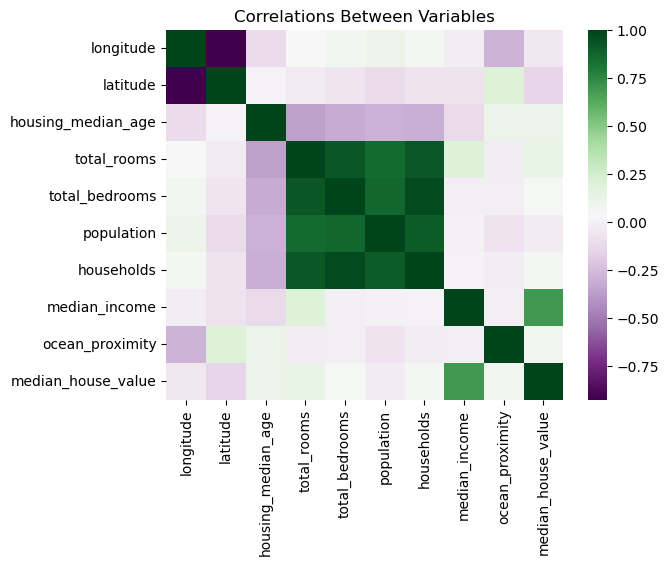

In [15]:
## Visualizing the correlations between numerical varibles
plt.figure()
sns.heatmap(data.corr(),cmap="PRGn")
plt.title("Correlations Between Variables")

# Data Visualization

Visualizing the Correlation between the numerical variables using pairplot visualization

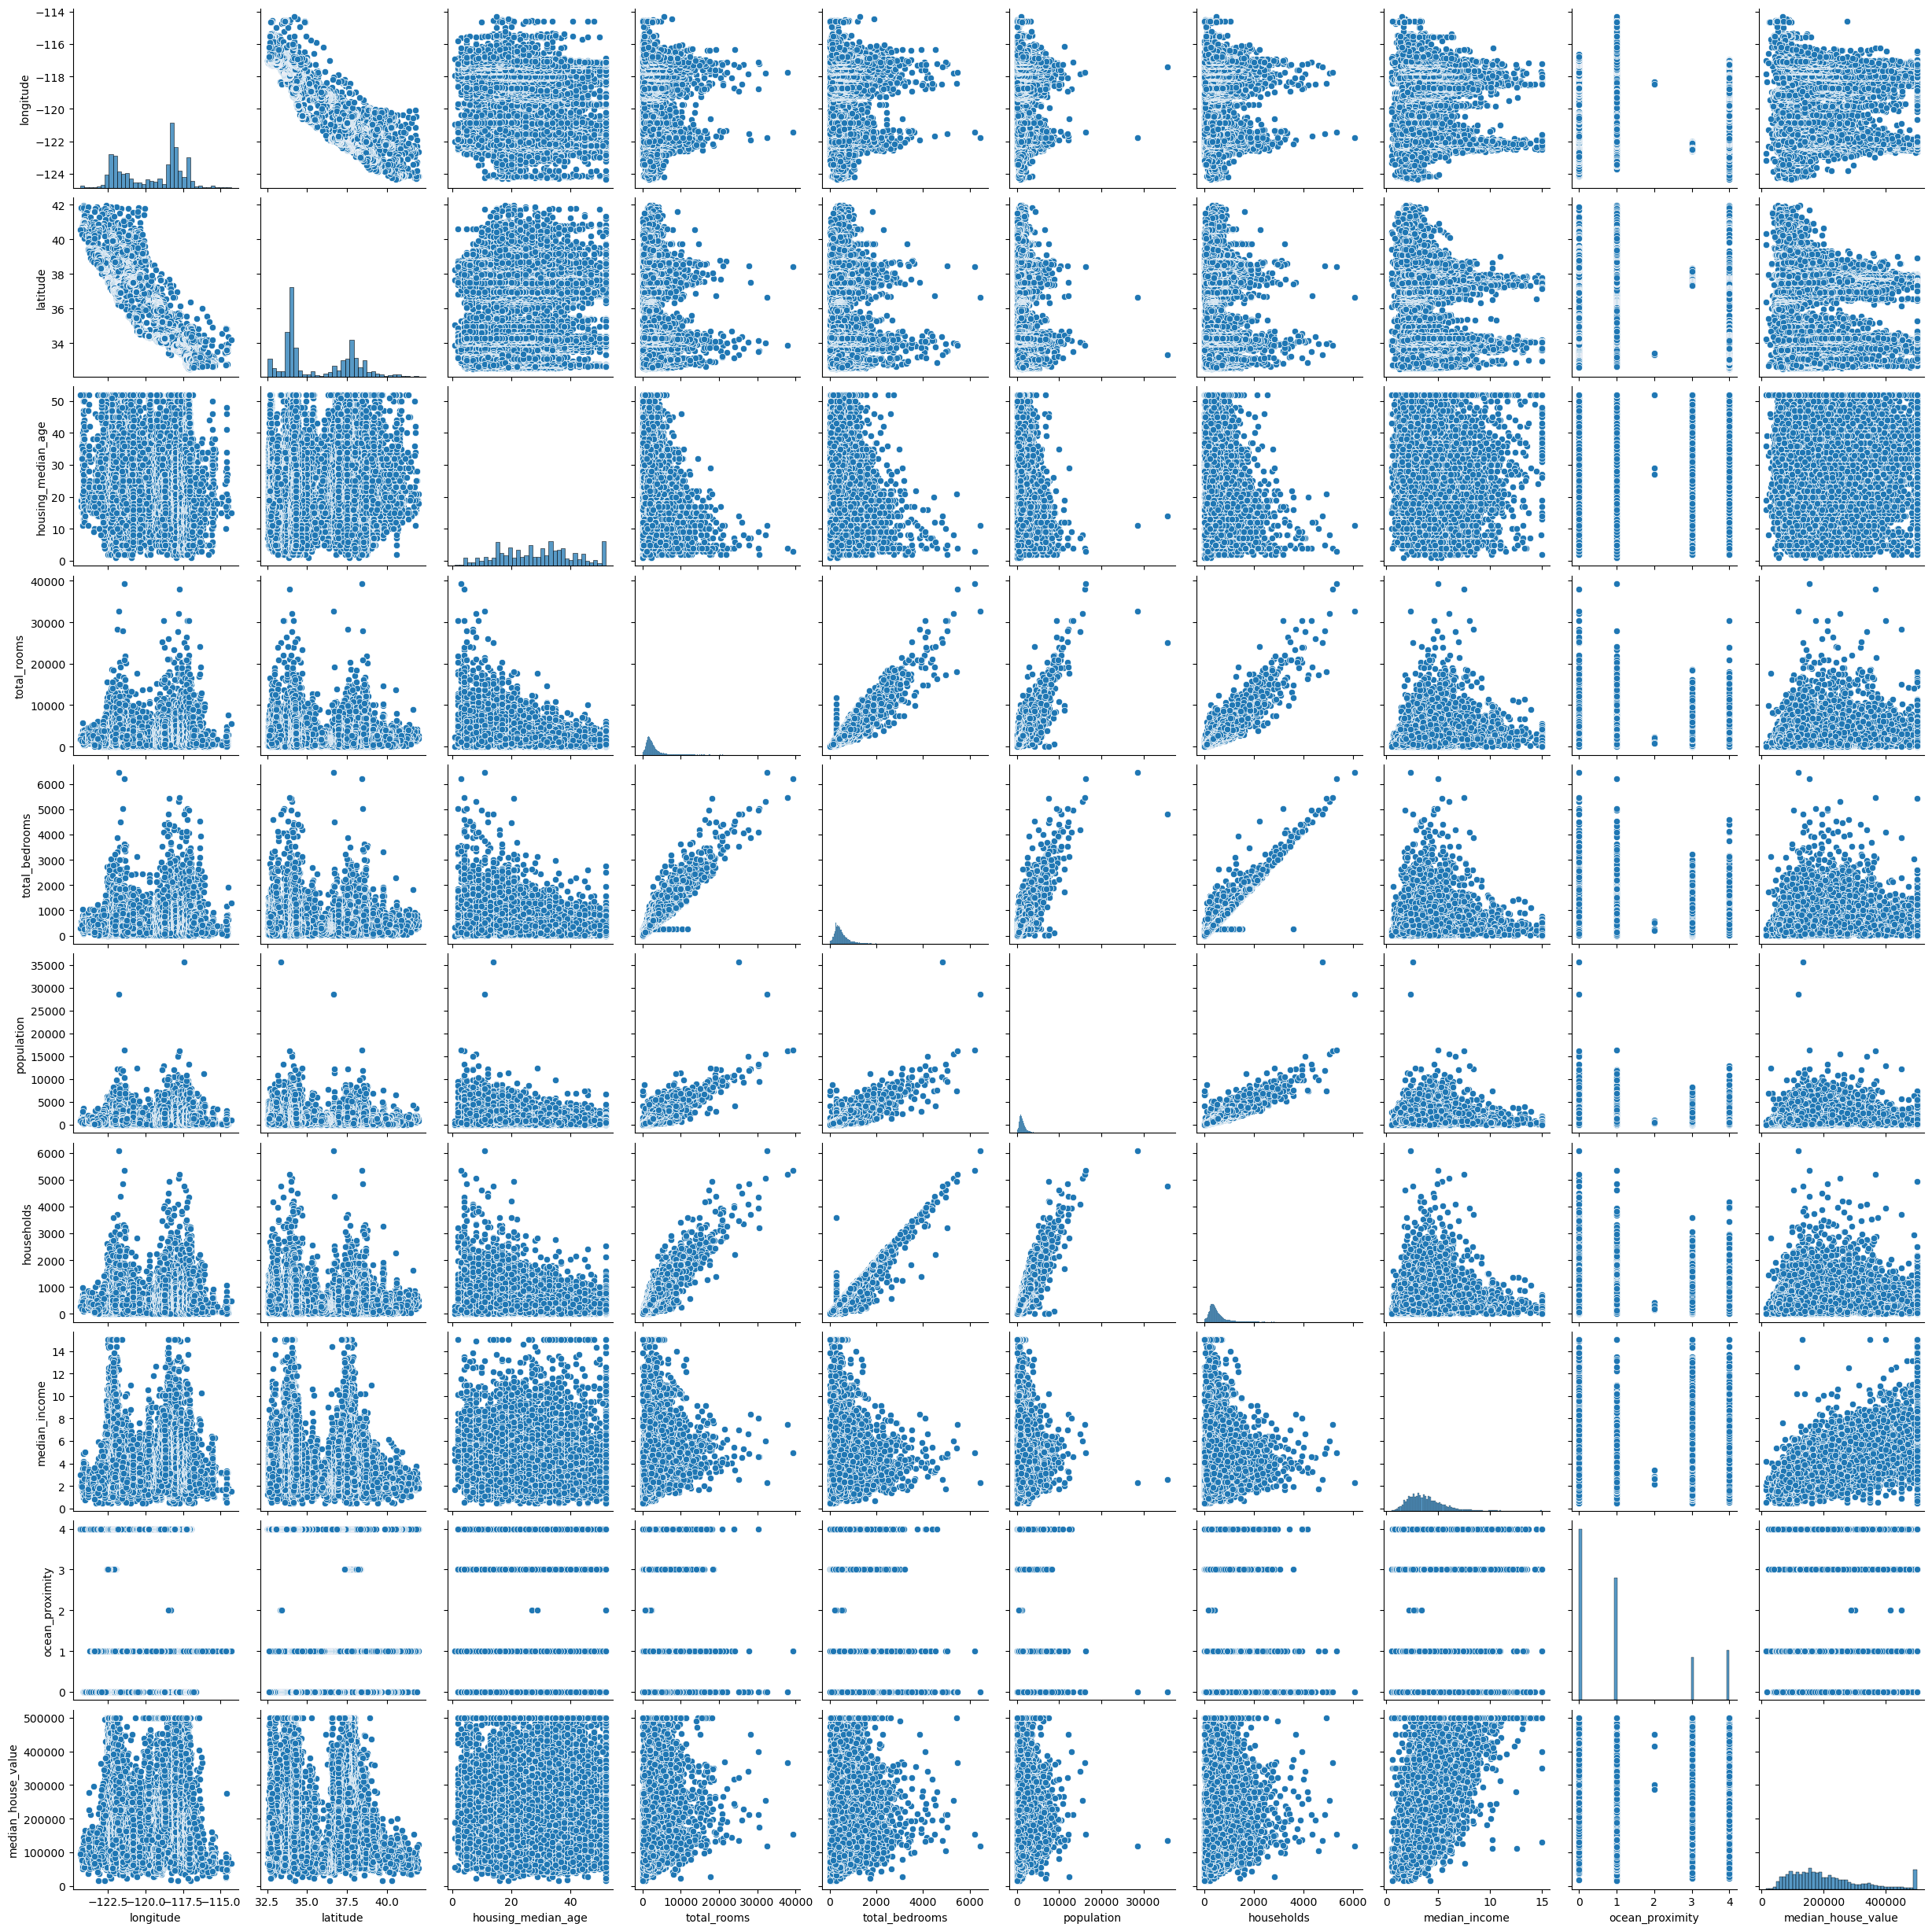

In [16]:
sns.pairplot(data)

In [17]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

**Visualizing the Correlation between each column and the target variable using jointplot visualization.**

<Figure size 1000x900 with 0 Axes>

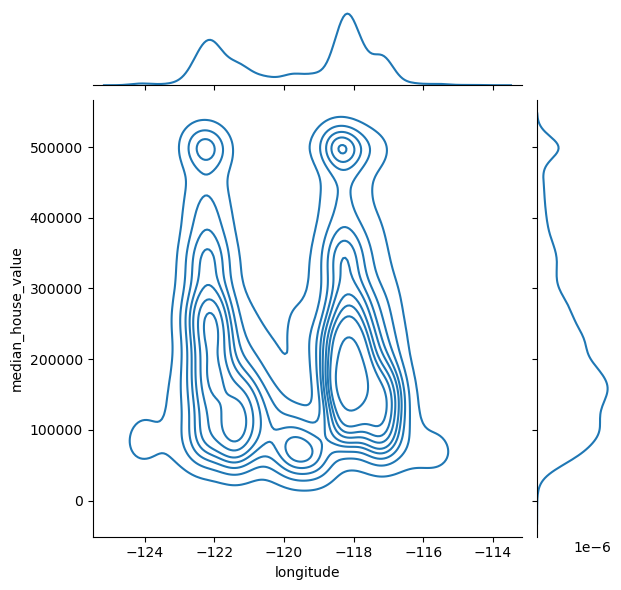

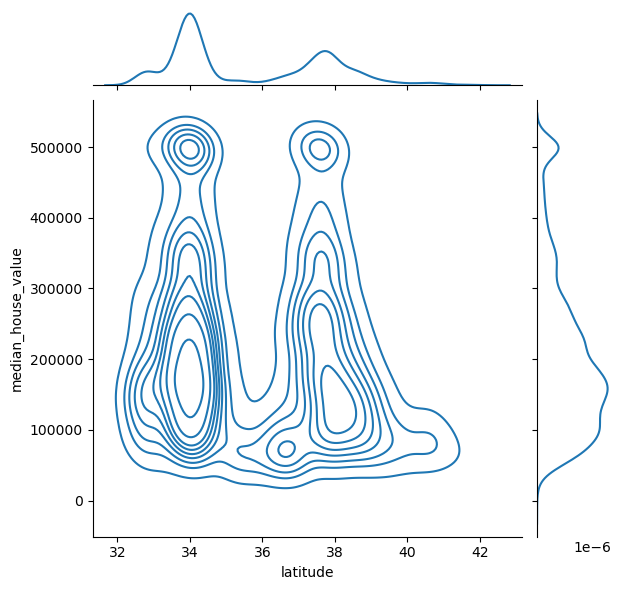

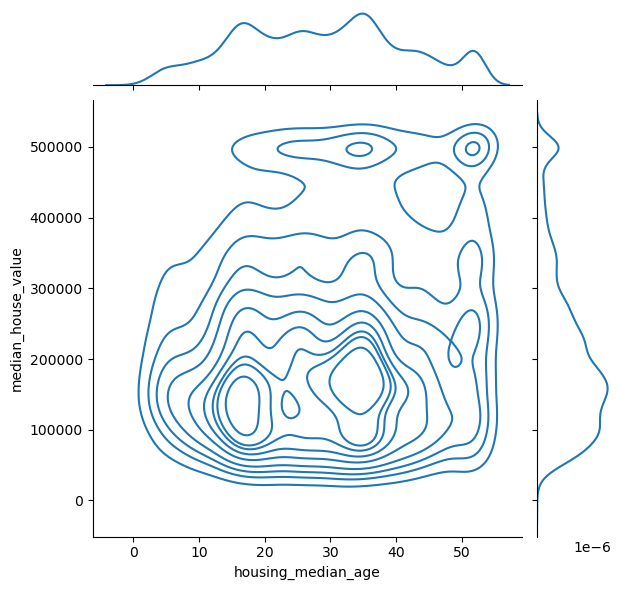

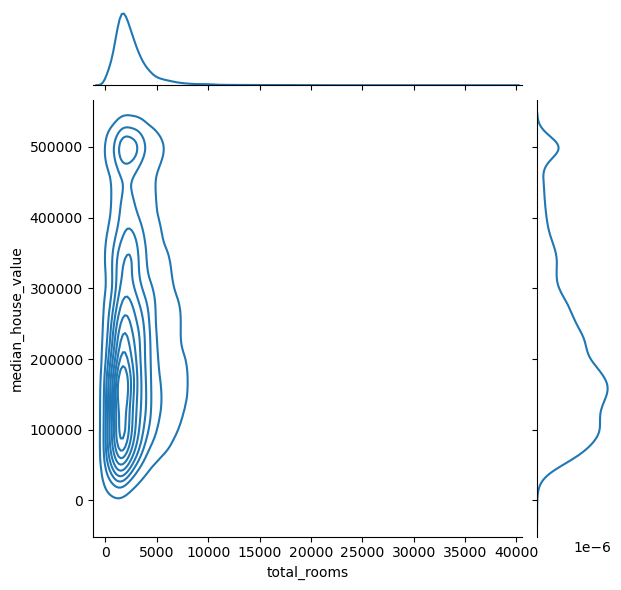

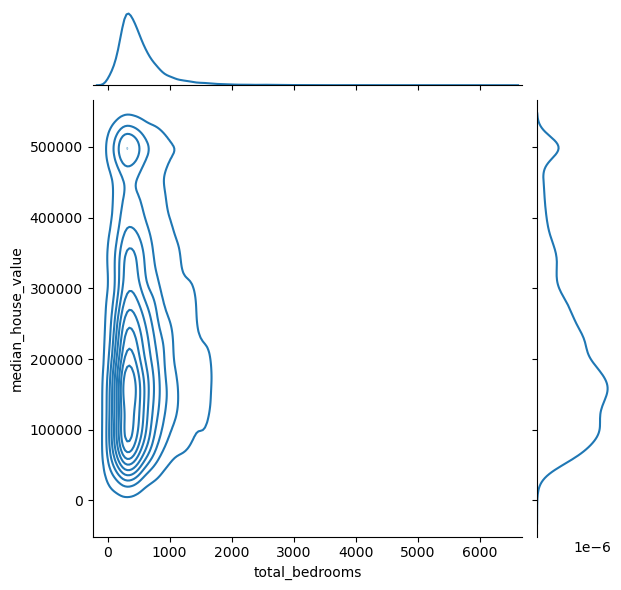

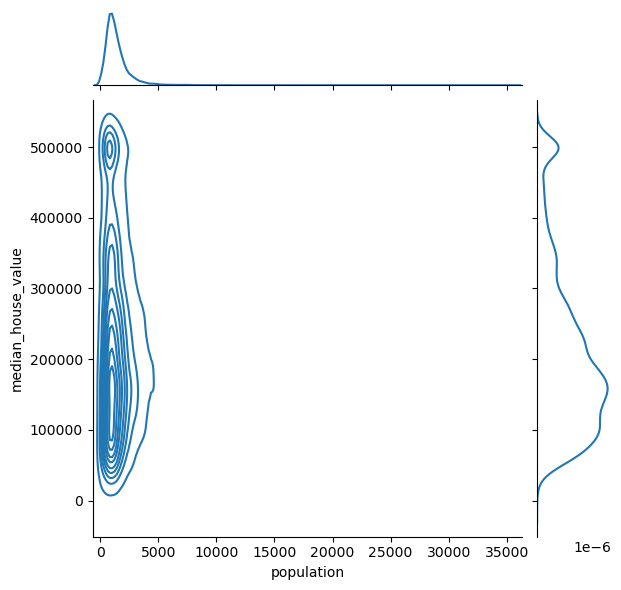

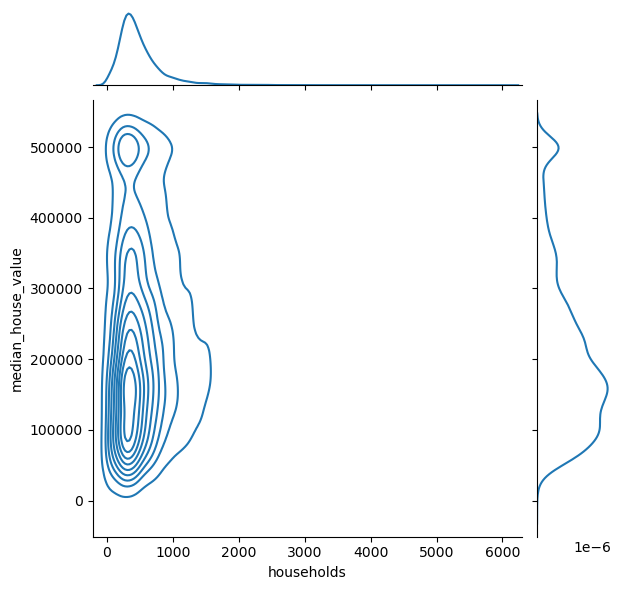

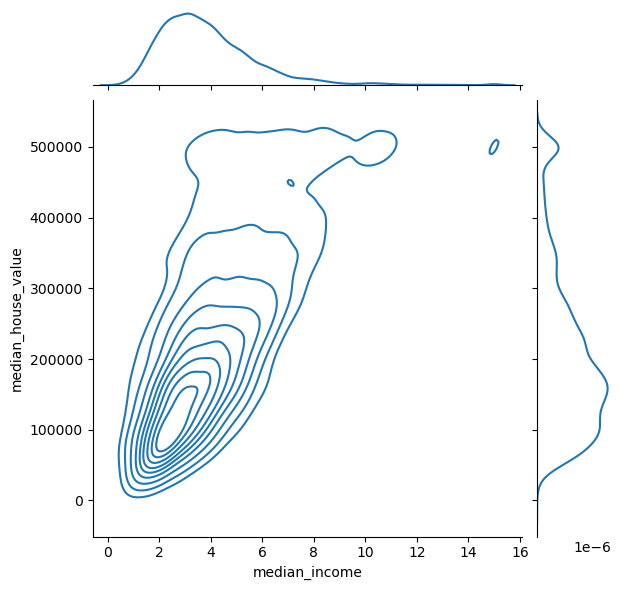

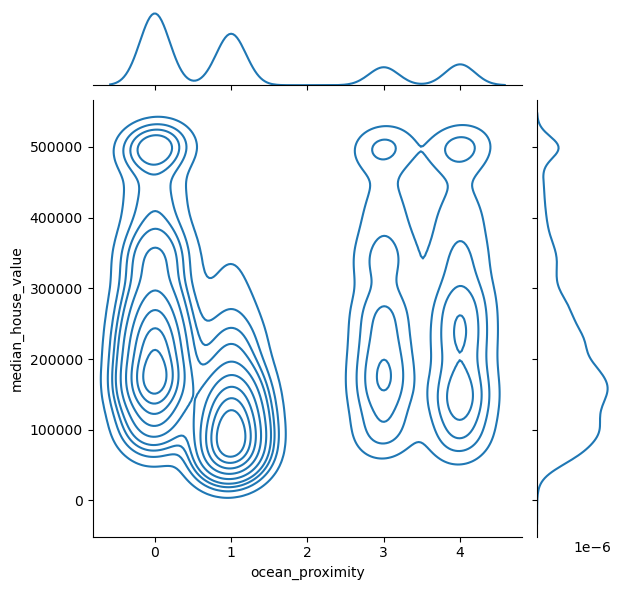

In [18]:
plt.figure(figsize=(10,9))
sns.jointplot(x=data["longitude"], y=data['median_house_value'], kind="kde")
sns.jointplot(x=data["latitude"], y=data['median_house_value'], kind="kde")
sns.jointplot(x=data["housing_median_age"], y=data['median_house_value'], kind="kde")
sns.jointplot(x=data["total_rooms"], y=data['median_house_value'], kind="kde")
sns.jointplot(x=data["total_bedrooms"], y=data['median_house_value'], kind="kde")
sns.jointplot(x=data["population"], y=data['median_house_value'], kind="kde")
sns.jointplot(x=data["households"], y=data['median_house_value'], kind="kde")
sns.jointplot(x=data["median_income"], y=data['median_house_value'], kind="kde")
sns.jointplot(x=data["ocean_proximity"], y=data['median_house_value'], kind="kde")
plt.show()

## Spliting data into featurs and columns

In [19]:
x = data.drop("median_house_value",axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


In [20]:
y = data["median_house_value"]
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

# Standardizing the Data
Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:



In [21]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8
0,-1.327835,1.052548,0.982143,-0.804819,-0.967245,-0.974429,-0.977033,2.344766,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.358707,0.861439,1.669961,2.332238,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.822021,-0.820777,-0.843637,1.782699,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.714889,-0.766028,-0.733781,0.932968,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.607758,-0.759847,-0.629157,-0.012881,1.291089


## Split data into train and test set.

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

# Training Model

In [24]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6146755630367238

In [25]:
y_preds = model.predict(x_test)
y_preds

array([274046.54057167, 154886.60119687, 452155.38968434, ...,
       136291.67983609, 198785.92508736,  54492.63053325])

## Metrics
* **R2 Score**
* **mean_absolute_error**
* **mean_squared_error**

In [26]:
r2_score(y_test,y_preds)

0.6146755630367238

In [27]:
## mean Absolute error
mean_absolute_error(y_test,y_preds)

52978.516591005624

In [28]:
mean_squared_error(y_test,y_preds)

5337238482.058225

### **Thank you so much for reading notebook.**